In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test_path = "D:/Project/test"
train_path = "D:/Project/train"
valid_path = "D:/drive/valid"

In [4]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=50, shuffle=False)
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=180)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=50)

Found 13593 images belonging to 2 classes.
Found 47236 images belonging to 2 classes.
Found 9666 images belonging to 2 classes.


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()


mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [6]:
#Deleting the last 5 layers and replacing it with a dense softmax layer consisting of 2 nodes: Fire and Non-fire
x = mobile.layers[-2].output
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [8]:
#Freezing weights all the layers upto the 4th last layer
#This is done because we will retrain only the last three layers
for layer in model.layers[:-4]:
    layer.trainable = False

In [9]:
model.compile(Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
checkpoint=tf.keras.callbacks.ModelCheckpoint("D:/Project/project_v1.h5",
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001)

In [12]:
model.fit_generator(train_batches, steps_per_epoch = 27, validation_data=valid_batches, validation_steps=27, epochs=3, verbose=1, callbacks=[checkpoint,reduce_lr])

C:\Users\mamoo\AppData\Local\Temp\ipykernel_17876\1102617402.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches, steps_per_epoch = 27, validation_data=valid_batches, validation_steps=27, epochs=3, verbose=1, callbacks=[checkpoint,reduce_lr])


Epoch 1/3
27/27 [==============================] - 144s 5s/step - loss: 1.1086 - accuracy: 0.8541 - val_loss: 0.0293 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 2/3
27/27 [==============================] - 117s 4s/step - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0186 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 3/3
27/27 [==============================] - 101s 4s/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.0050 - val_accuracy: 0.9985 - lr: 0.0010


In [14]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
test_batches.class_indices

{'fire': 0, 'nonfire': 1}

In [16]:
predictions = model.predict(test_batches, batch_size=10, verbose=1)

272/272 [==============================] - 90s 317ms/step


In [17]:
predictions

array([[6.0694821e-02, 9.3930519e-01],
       [1.0000000e+00, 5.5543932e-13],
       [1.0000000e+00, 1.9134781e-10],
       ...,
       [9.9990940e-01, 9.0577712e-05],
       [5.9239455e-02, 9.4076061e-01],
       [2.3259455e-04, 9.9976736e-01]], dtype=float32)

In [18]:
predictions.shape

(13593, 2)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_labels.shape

(13593,)

In [21]:
cm = confusion_matrix(test_labels, predictions.argmax(axis =1))

In [22]:
test_batches.class_indices

{'fire': 0, 'nonfire': 1}

Confusion matrix, without normalization
[[3417   83]
 [ 130 9963]]


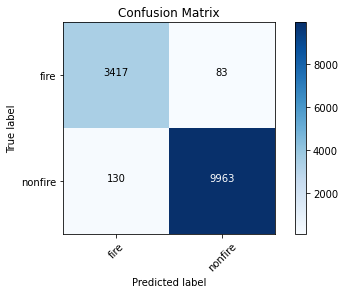

In [23]:
cm_plot_labels = ['fire','nonfire']
plot_confusion_matrix(cm ,cm_plot_labels, title='Confusion Matrix')